In [47]:
import openai
import os
import requests

openai.api_key = os.getenv("OPENAI_API_KEY")

idx2label = {
    "0": "amusement",
    "1": "awe",
    "2": "contentment",
    "3": "excitement",
    "4": "anger",
    "5": "disgust",
    "6": "fear",
    "7": "sadness"
}

In [28]:
def generate_image(prompt, image_idx):
    """
    Generate an image based on a text prompt using the OpenAI API, 
    and save it to a specified directory.

    Parameters:
        prompt (str): A textual description to generate the image.
        image_idx (int): Index to use for naming the generated image.
    """
    try:
        # Call the OpenAI API to generate an image from the prompt
        response = openai.Image.create(
            model = "dall-e-3",
            prompt=prompt,
            n=1,  # Number of images to generate
            size="1024x1024"  # Size of the image
        )
        
        # Extract the image URL from the response
        image_url = response['data'][0]['url']
        
        # Download the image and save it to the directory
        image_path = os.path.join("generated_images", f"{image_idx}.png")
        image_response = requests.get(image_url)
        
        # Check if the response is successful
        if image_response.status_code == 200:
            with open(image_path, "wb") as f:
                f.write(image_response.content)
            print(f"Image saved at: {image_path}")
        else:
            print(f"Failed to fetch image. HTTP status code: {image_response.status_code}")
    except Exception as e:
        print(f"An error occurred: {e}")

In [26]:
# Example usage
generate_image("A futuristic cityscape at sunset", 1)

KeyboardInterrupt: 

In [ ]:
from IPython.display import Image, display
image_path = 'generated_images/1.png'
display(Image(filename=image_path))

In [9]:
from datasets import load_dataset
# Load the full dataset (not streaming mode)
subset = '2m_random_1k'
dataset = load_dataset("poloclub/diffusiondb", name=subset, split="train")

C:\Users\manee\PycharmProjects\EmoSetProject\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 1000 examples [00:11, 85.42 examples/s]


In [86]:
for i, prompt in enumerate(dataset["prompt"]):
    if i in generated_ids:
        continue
    generate_image(prompt, i)
    if len(os.listdir("generated_images")) >= 200:
        break

Image saved at: generated_images\3.png
An error occurred: Your request was rejected as a result of our safety system. Your prompt may contain text that is not allowed by our safety system.
Image saved at: generated_images\19.png
Image saved at: generated_images\21.png
Image saved at: generated_images\26.png
Image saved at: generated_images\28.png
Image saved at: generated_images\29.png
Image saved at: generated_images\32.png
Image saved at: generated_images\33.png
Image saved at: generated_images\34.png
An error occurred: Your request was rejected as a result of our safety system. Your prompt may contain text that is not allowed by our safety system.
An error occurred: Your request was rejected as a result of our safety system. Your prompt may contain text that is not allowed by our safety system.
An error occurred: Rate limit exceeded for images per minute in organization org-tczdaP2Oi9XrmqrSj4pq8iE4. Limit: 5/1min. Current: 6/1min. Please visit https://platform.openai.com/docs/guides

In [89]:
print(len(os.listdir("generated_images")))
print(generated_ids)

200
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 46, 53, 54, 56, 63, 66, 76, 77, 78, 79, 80, 81, 91, 92, 93, 94, 95, 96, 97, 98, 99, 102, 103, 104, 105, 106, 107, 109, 112, 113, 114, 158, 159, 161, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 292, 294, 295, 360, 361, 362, 363, 364, 365, 366, 385, 386, 387, 389, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 428, 429, 430, 431, 432, 433, 435, 436, 439, 465, 466, 467, 469, 531, 532, 534, 540, 542, 544, 545, 546, 547, 548, 550, 551, 552, 554, 555, 558, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 675, 676, 677, 678, 723, 724, 725, 726, 727, 728, 730, 731, 732, 733, 734, 735, 737, 738, 739, 740, 745]


In [ ]:
output_dir = "generated_images"

# Loop through all images in the directory and display them
for image_file in os.listdir(output_dir):
    if image_file.endswith(".png"):
        image_path = os.path.join(output_dir, image_file)
        display(Image(filename=image_path))
        i = int(os.path.basename(image_path).split('.')[0]) 
        display(dataset[i]["image"])
        print(dataset[i]["prompt"])


Next Steps: Generate CSV of image idx, prompt

In [20]:
import pandas as pd
prompts = dataset["prompt"]
ids = [i for i in range(len(prompts))]
# Step 3: Create a pandas DataFrame with the extracted columns
df = pd.DataFrame({
    "id": ids,
    "prompt": prompts
})

id_captions_csv_file = 'C:/Users/manee/PycharmProjects/EmoSetProject/diffusiondb-2m_random_1k-prompts.csv'
# Step 4: Save the DataFrame to a CSV file
df.to_csv(id_captions_csv_file, index=False)

print("CSV file created successfully!")

CSV file created successfully!


In [ ]:
# TODO: Take this csv file, run annotate.py on it, take the results from that and make a CSV file with the outputs for goemotion
# TODO: Create method to 

In [46]:
from PIL import Image as PILImage
import torch
from transformers import AutoModelForImageClassification, AutoImageProcessor
from torch.nn.functional import softmax

# Cell 6: Load the model and processor once
model_checkpoint = "VIT-Final-Finetune/checkpoint-3640"
model = AutoModelForImageClassification.from_pretrained(model_checkpoint)
processor = AutoImageProcessor.from_pretrained(model_checkpoint, use_fast=True)

In [93]:
# Cell 7: Define the prediction function
generated_class_probs = {idx2label[str(i)]: [] for i in range(8)}
original_class_probs = {idx2label[str(i)]: [] for i in range(8)}
def predict_emotion(image_input, generated = False):
    """
    Predict the emotion from an image using a fine-tuned Hugging Face model.

    Parameters:
        image_input (str or PIL.Image.Image): The image file path or a PIL image.
        generated (bool): Whether the image was generated or not. Defaults to False.

    Returns:
        int: The predicted label index for the image. 
    """
    # Open the image if a file path is provided
    if isinstance(image_input, str):
        image = PILImage.open(image_input)
    else:
        image = image_input

    # Preprocess the image
    inputs = processor(images=image, return_tensors="pt")

    # Perform the prediction
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probs = softmax(logits, dim=-1)   
    probs = probs.squeeze()

    max = torch.argmax(probs, dim=-1).item()

    for class_idx, prob in enumerate(probs):
        if generated:
            generated_class_probs[idx2label[str(class_idx)]].append(prob.item())
        else:
            original_class_probs[idx2label[str(class_idx)]].append(prob.item())
    # print("Image predicted.")
    return max

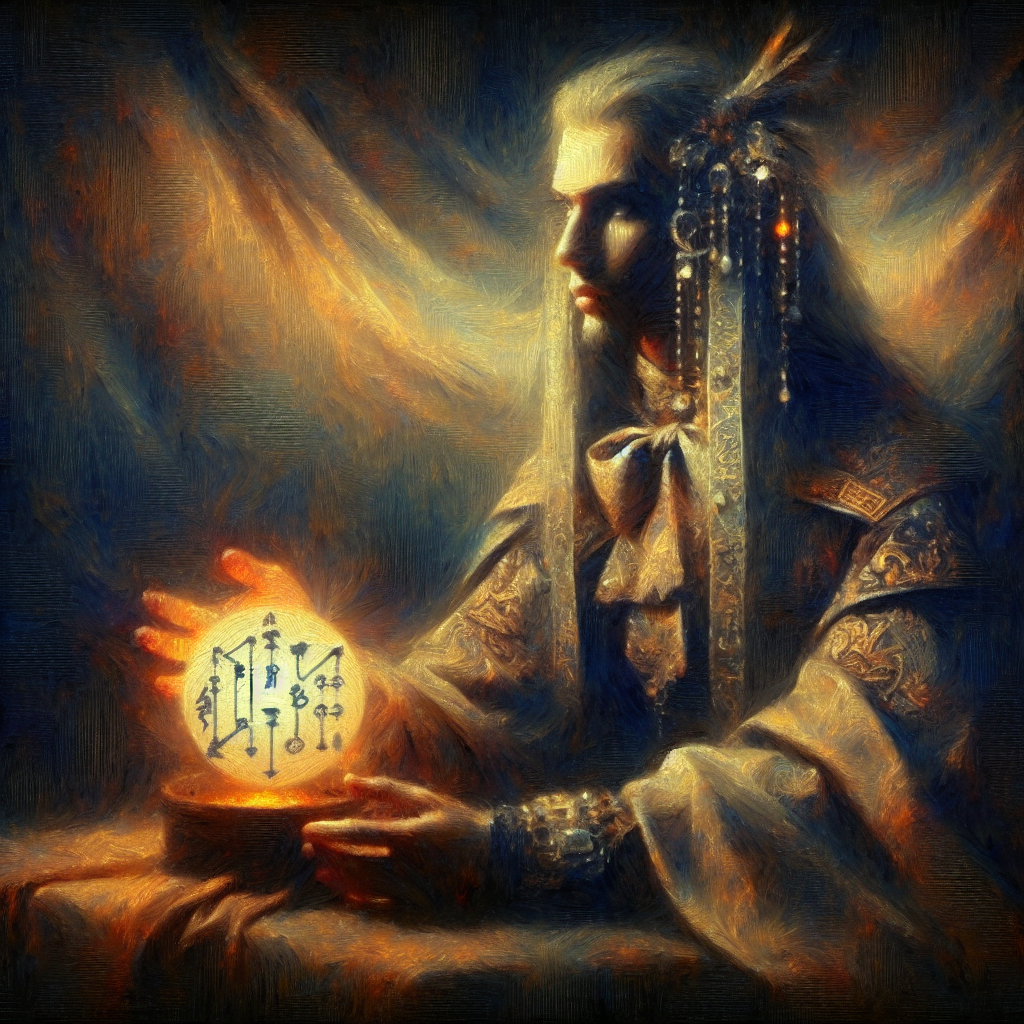

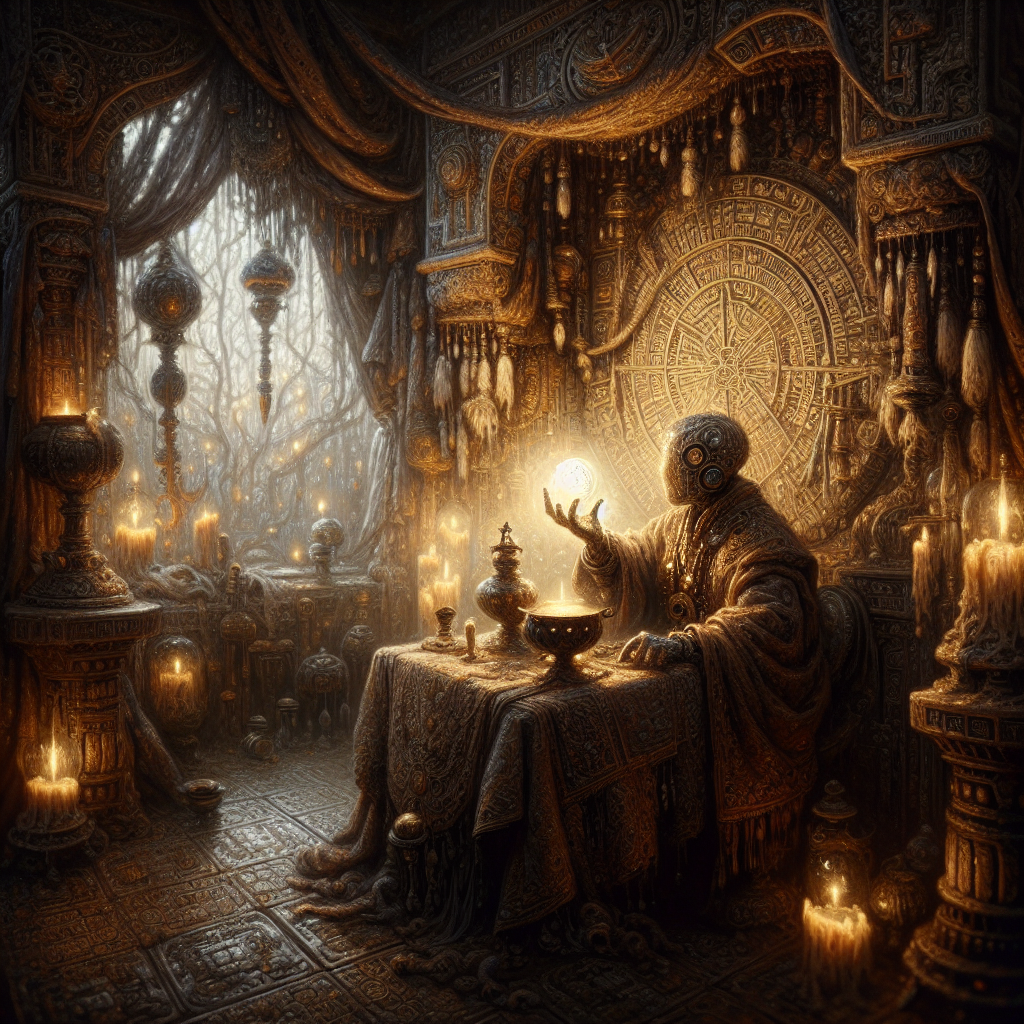

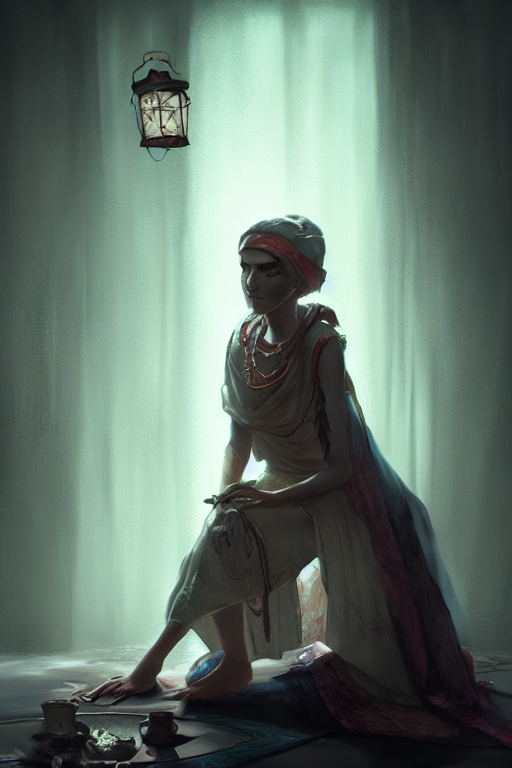

the fortune teller, illustration, soft lighting, soft details, dark mood, painting oil on canvas by Cedric Peyravernay octane render trending on artstation d&d characters, 4k, 8k, HD
6
6
1


In [97]:
image_path = "generated_images/1.png"
generated_image = PILImage.open(image_path)
display(generated_image)

# generate_image(dataset[1]["prompt"], 9999)
gen_image_2 = PILImage.open("generated_images/9999.png")
display(gen_image_2)

original_image = dataset[1]["image"]
display(original_image)

print(dataset[1]["prompt"])
print(predict_emotion(generated_image, True))
print(predict_emotion(original_image))
print(predict_emotion(gen_image_2))


In [ ]:
import subprocess
subprocess.run([
        "python", "annotate.py",
        "--pretrained-folder", "C:/Users/manee/PycharmProjects/EmoSetProject/goemotions",
        "--emotion-config",
        "C:/Users/manee/PycharmProjects/EmoSetProject/Demux-MEmo-master/emotion_configs/goemotions.json",
        "--domain", "twitter",
        "--input-filename", id_captions_csv_file,
        "--input-format", "csv",
        "--out", "C:/Users/manee/PycharmProjects/EmoSetProject/diffusiondb-2m_random_1k-prompt-emotion-distributions-FULL.jsonl",
        "--device", "cuda:0",
        "--text-column", "prompt",
        "--id-column", "id"
    ], cwd=r"C:\Users\manee\PycharmProjects\EmoSetProject\Demux-MEmo-master", shell=True, check=True)

In [88]:
generated_ids = []
# Iterate over all files in the directory

files = os.listdir("generated_images")
sorted_files = sorted(files, key=lambda x: int(x.split('.')[0]))

for filename in sorted_files:
    # Check if the filename ends with '.png' and starts with a digit
    if filename.endswith('.png') and filename.split('.')[0].isdigit():
        # Append the integer value to the list
        generated_ids.append(int(filename.split('.')[0]))

# Print the list of numbers
print(generated_ids)

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 46, 53, 54, 56, 63, 66, 76, 77, 78, 79, 80, 81, 91, 92, 93, 94, 95, 96, 97, 98, 99, 102, 103, 104, 105, 106, 107, 109, 112, 113, 114, 158, 159, 161, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 292, 294, 295, 360, 361, 362, 363, 364, 365, 366, 385, 386, 387, 389, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 428, 429, 430, 431, 432, 433, 435, 436, 439, 465, 466, 467, 469, 531, 532, 534, 540, 542, 544, 545, 546, 547, 548, 550, 551, 552, 554, 555, 558, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 675, 676, 677, 678, 723, 724, 725, 726, 727, 728, 730, 731, 732, 733, 734, 735, 737, 738, 739, 740, 745]


In [90]:
import json
# List of target emotions to be aggregated
target_emotions = ["amusement", "surprise", "joy", "excitement", "anger", "disgust", "fear", "sadness"]

# Step 1: Pre-initialize the dictionary with empty lists for each target emotion
emotions_aggregated = {emotion: [] for emotion in target_emotions}

# Step 2: Open and read the .jsonl file
with open('diffusiondb-2m_random_1k-prompt-emotion-distributions-FULL.jsonl', 'r') as file:
    for line in file:
        # Parse each line as a JSON object
        data = json.loads(line)
        
        if data["id"] not in generated_ids:
            continue
            
        # Step 3: Iterate over the target emotions and add their scores if they exist in the current item
        for emotion in target_emotions:
            # Check if the target emotion is in the current item's emotions dictionary
            if emotion in data['emotions']:
                emotions_aggregated[emotion].append(data['emotions'][emotion])

class_probs_output_path = f'diffusiondb-{subset}-prompt-emotion-distributions.json'

with open(f'class-probs/{class_probs_output_path}', 'w') as json_file:
    json.dump(emotions_aggregated, json_file)

print(f'JSON file "{class_probs_output_path}" created successfully!')

JSON file "diffusiondb-2m_random_1k-prompt-emotion-distributions.json" created successfully!


In [94]:
from tqdm import tqdm
files = os.listdir("generated_images")
sorted_files = sorted(files, key=lambda x: int(x.split('.')[0]))

for filename in tqdm(sorted_files, desc="Processing Images"):
    if filename.endswith(".png"):
        i = int(os.path.basename(image_path).split('.')[0]) 
        image_path = os.path.join(output_dir, filename)
        predict_emotion(image_path, True)
        predict_emotion(dataset[i]["image"])

class_probs_output_path = f'diffusiondb-{subset}-original-image-emotion-distributions.json'

# Write the class probabilities to a JSON file
with open(f'class-probs/{class_probs_output_path}', 'w') as json_file:
    json.dump(original_class_probs, json_file)

print(f"Class probabilities have been saved to {class_probs_output_path}")

class_probs_output_path = f'diffusiondb-{subset}-generated-image-emotion-distributions.json'

# Write the class probabilities to a JSON file
with open(f'class-probs/{class_probs_output_path}', 'w') as json_file:
    json.dump(generated_class_probs, json_file)

print(f"Class probabilities have been saved to {class_probs_output_path}")

Processing Images: 100%|██████████| 200/200 [03:00<00:00,  1.11it/s]

Class probabilities have been saved to diffusiondb-2m_random_1k-original-image-emotion-distributions.json
Class probabilities have been saved to diffusiondb-2m_random_1k-generated-image-emotion-distributions.json
